In [1]:
import pandas as pd
import yfinance as yf

# Scarica lista S&P500 da Wikipedia
tickers = pd.read_csv("constituents.csv")["Symbol"].tolist()

# Alcuni ticker hanno un punto (es. BRK.B, BF.B) → Yahoo li vuole con trattino
tickers = [t.replace(".", "-") for t in tickers]

print(f"Totale ticker: {len(tickers)}")
print(tickers[:10])
print(tickers[-10:])

Totale ticker: 503
['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']
['WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZTS']


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for multiple tockets
#50 tockets
data = yf.download(tickers, start="2023-01-01", end="2025-01-01")['Close']
#remove columns with all NaN values
data = data.dropna(axis=1, how='all')
print(data.shape) 

/tmp/ipykernel_40971/85012612.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  503 of 503 completed


(502, 503)


cleaning

In [3]:
nan_frac = data.isna().mean()

# tieni solo colonne con meno del 5% di NaN
ok_cols = nan_frac[nan_frac <= 0.05].index
data_clean = data[ok_cols]

print(f"Titoli rimasti dopo filtro: {len(ok_cols)}")

data_clean = data_clean.fillna(method='ffill').fillna(method='bfill')

subset = data_clean.iloc[:, :100]
print(subset.shape)
#lavori su 100 titoli per evitare sovraccarico di memoria


Titoli rimasti dopo filtro: 499
(502, 100)


/tmp/ipykernel_40971/3250211763.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = data_clean.fillna(method='ffill').fillna(method='bfill')


In [4]:
## Dati reali

R shape: (501, 100)
First 5 rows of R:
 [[ 0.66087666  0.66010121  0.55296039  1.79207239  1.23227482  0.26746413
  -0.27176443  0.57976127  1.12161283 -1.90706088  0.36185176  0.76123025
   0.41425707  0.5420372  -1.25163885  0.30528874  0.96588859  0.8560867
   1.07185952  0.58802849  1.29173744  1.88608781  1.05226614  0.93747006
   1.03994093  0.68292776  0.29090573  0.14360154  0.7012354   0.40590336
   1.24127949 -0.51042842 -2.32511039  0.85311853  1.76864818 -1.42636458
   0.00507159  0.92815641  1.10741616  1.39509895  1.01944761  0.56885691
   1.28262011  0.33672748  1.51665386  1.53569638  0.02296973  1.36850233
   0.40434121  2.12163003  1.15109695  0.55405592  1.36463159  1.00719618
   0.63626824  1.4459034   0.5836824  -0.33980625 -0.36906967  1.73751477
   2.22055601 -1.82421256  0.68261301  1.02137576  0.34595745  1.21688518
   1.58825673  1.27388516  0.7993948   1.12737044  0.03753337  1.4991172
  -0.32296572  0.19175763  0.48825083  0.54872646  1.33034355 -1.28702803


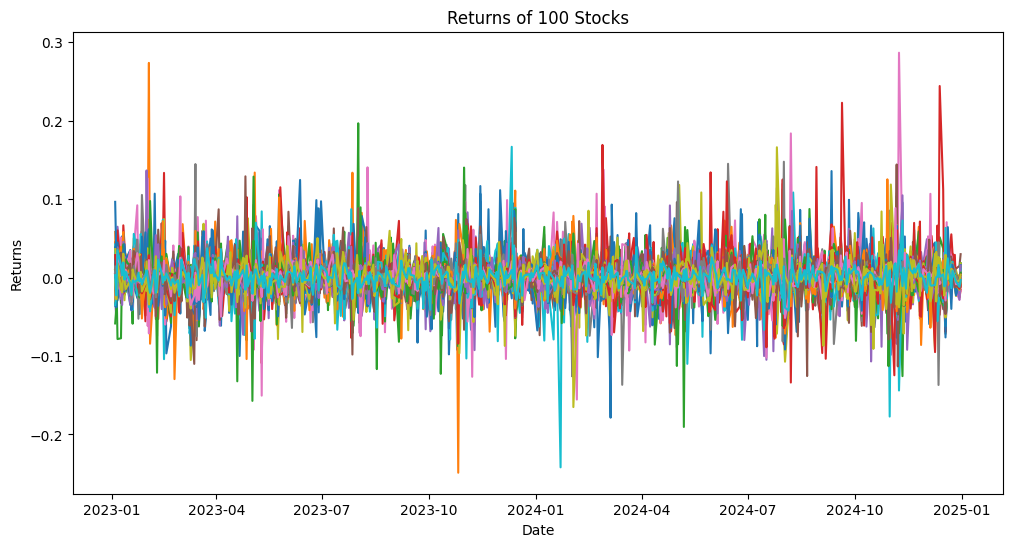

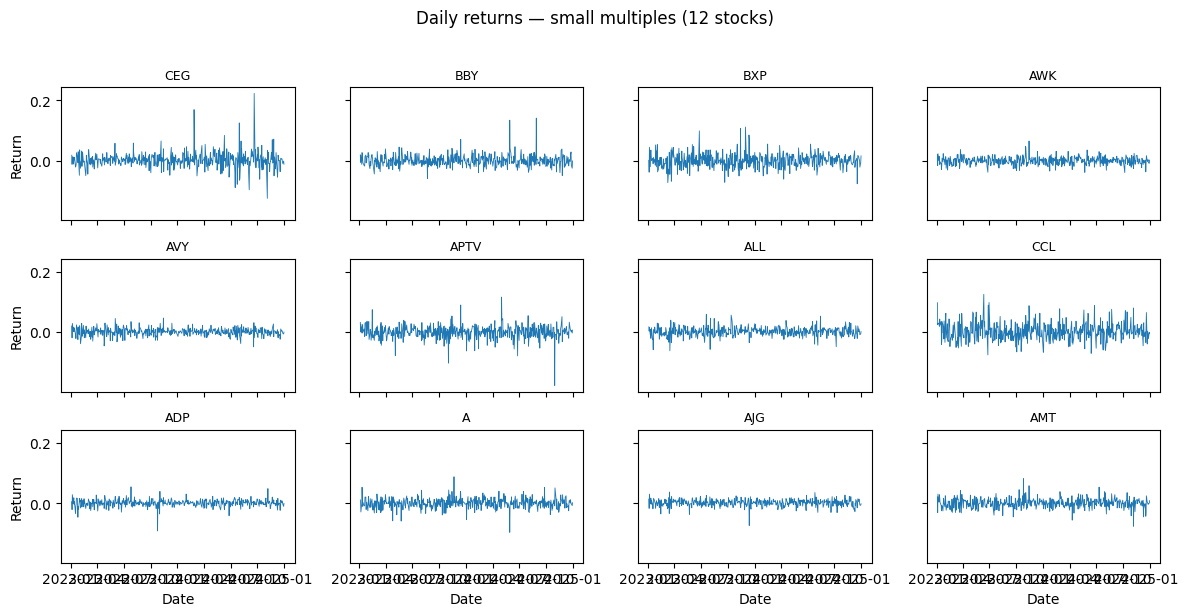

In [18]:
import sys
sys.path.append("../src")
from finrmt.data import returns

#for multiple tockets defined before

returns = returns(subset)
#non log returns
def ret_nonlog(prices):
    retur = prices.pct_change()
    return retur



R = returns.dropna(how="any").to_numpy(dtype=float)   # shape: (T, N)

T, N = R.shape
print("R shape:", R.shape)
print("First 5 rows of R:\n", R[:5])

non_log_df = ret_nonlog(subset).dropna(how="any")

plt.figure(figsize=(12, 6))
plt.plot(non_log_df.index, non_log_df.values)
plt.title("Returns of 100 Stocks")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

np.random.seed(42)
cols = np.random.choice(ret_df.columns, size=12, replace=False)
ret_small = ret_df[cols]

fig, axes = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.ravel()
for ax, c in zip(axes, cols):
    ax.plot(ret_small.index, ret_small[c], lw=0.6)
    ax.set_title(c, fontsize=9)
for ax in axes[::4]: ax.set_ylabel('Return')
for ax in axes[-4:]: ax.set_xlabel('Date')
fig.suptitle('Daily returns — small multiples (12 stocks)', y=1.02)
plt.tight_layout(); plt.show()



C shape: (100, 100)
First 5 rows of C:
 [[ 0.99800399  0.17726401  0.14894562  0.22790344  0.31759557]
 [ 0.17726401  0.99800399  0.00379565  0.30355145  0.08984654]
 [ 0.14894562  0.00379565  0.99800399 -0.03182212  0.25842752]
 [ 0.22790344  0.30355145 -0.03182212  0.99800399  0.09928602]
 [ 0.31759557  0.08984654  0.25842752  0.09928602  0.99800399]]


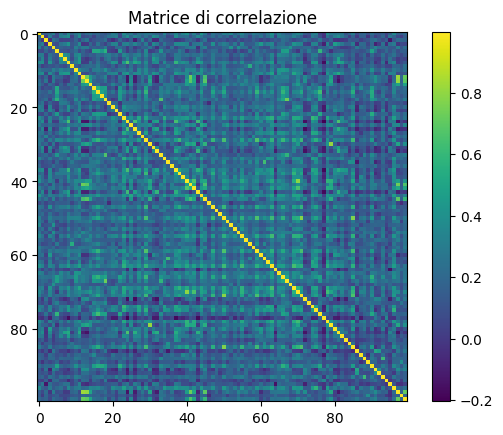

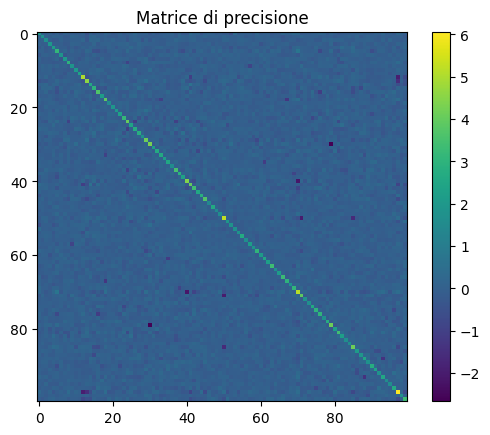

In [6]:
C = (R.T @ R) / T
W = np.linalg.inv(C)
print("C shape:", C.shape)
print("First 5 rows of C:\n", C[:5, :5])

plt.imshow(C, cmap='viridis')
plt.colorbar()
plt.title("Matrice di correlazione")
plt.show()

#matrice di precisione
plt.imshow(W, cmap='viridis')
plt.colorbar()
plt.title("Matrice di precisione")
plt.show()


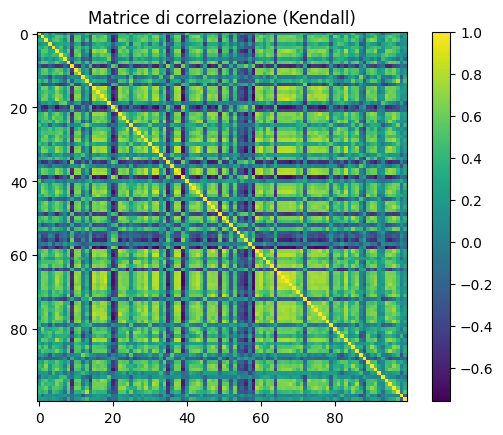

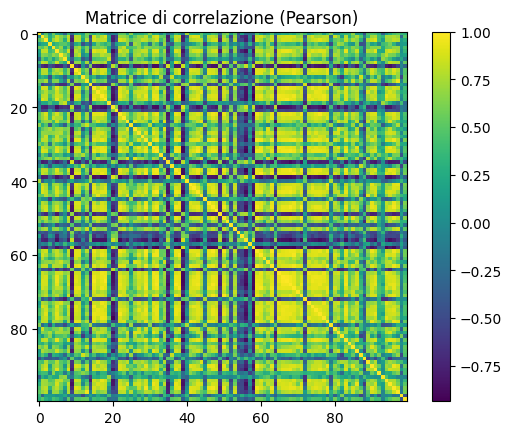

In [7]:
import sys
sys.path.append("../src")

from finrmt.cov import pearson, kendall
import matplotlib.pyplot as plt
import numpy as np

C_kendall = kendall(subset)
C_pearson = pearson(subset)

plt.imshow(C_kendall, cmap='viridis')
plt.colorbar()
plt.title("Matrice di correlazione (Kendall)")
plt.show()

plt.imshow(C_pearson, cmap='viridis')
plt.colorbar()
plt.title("Matrice di correlazione (Pearson)")
plt.show()